# Machine Learning on Diabetes. 
by Riwong Sherchan

## Importing necessary libraries
and setting up DataFrame

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC


In [2]:
#importing dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


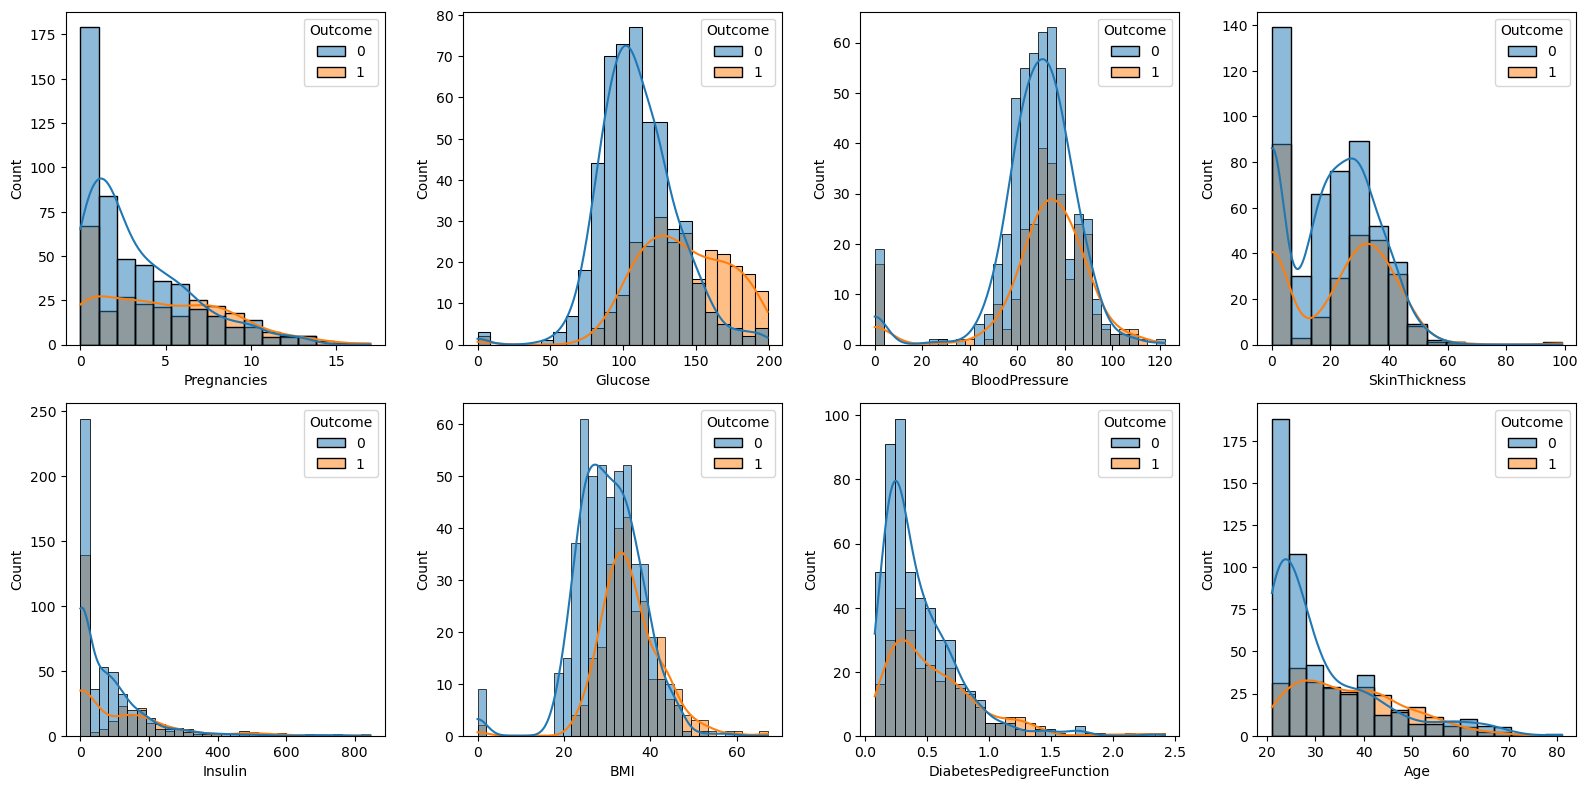

In [5]:
# Visualize the distribution of each feature
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, hue='Outcome', kde=True, ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

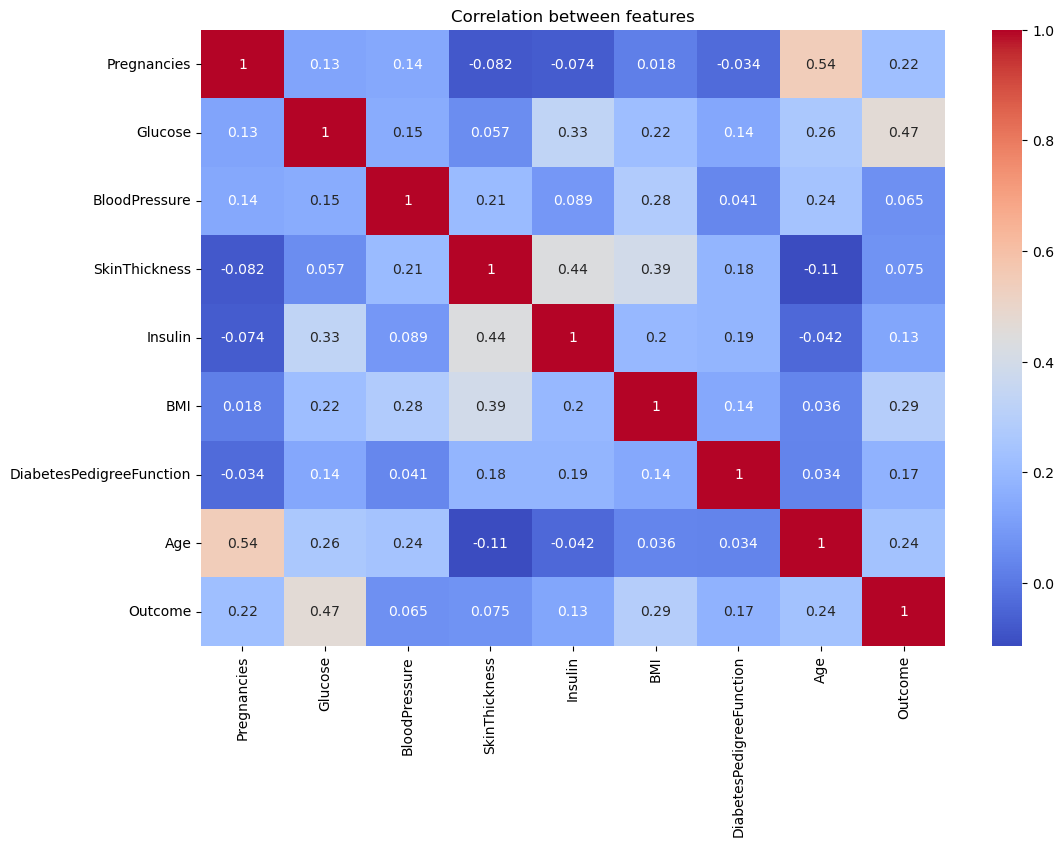

In [6]:
# Visualize the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

## Data Cleaning and Preprocessing

In [7]:
# Replace all 0 values with NaN
df.replace({'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}, np.nan, inplace=True)


In [8]:
# Replace NaN values with mean values
df.fillna(df.mean(), inplace=True)

In [9]:
# Split the dataset into features and target
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

## Model Training

In [10]:
# Split the dataset into training and testing sets using random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Split the dataset into training and testing sets using support vector Machines
X1_train, X1_test, y1_train, y1_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [11]:
# Train a random forest classifier with default parameters
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Fit an SVM model to the training data
svm = SVC(kernel='linear', C=1)
svm.fit(X1_train, y1_train)

SVC(C=1, kernel='linear')

## Model Evaluation and Prediction

In [12]:
# Make predictions on the random forest test set
y_pred = rf_classifier.predict(X_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [13]:
# Make predictions on the support vector machines
y1_pred = svm.predict(X1_test)
print(y1_pred)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


Evaluate the model

In [14]:
# Random Forest Classifier
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1_score = f1_score(y_test, y_pred)


In [15]:
# support vector machines

svm_accuracy = accuracy_score(y1_test, y1_pred)
svm_precision = precision_score(y1_test, y1_pred)
svm_recall = recall_score(y1_test, y1_pred)
svm_f1_score = f1_score(y1_test, y1_pred)

In [16]:
# Print the evaluation metrics for Random Forest Classifier
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)
print('')
# Print the evaluation metrics for SVM Classifier
print("SVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1_score)

Random Forest Classifier:
Accuracy: 0.7987012987012987
Precision: 0.6818181818181818
Recall: 0.6382978723404256
F1 Score: 0.6593406593406593

SVM Classifier:
Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622642
